<a href="https://colab.research.google.com/github/nithintata22/heart-disease-analysis/blob/main/heartattack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",\
               names=['age','sex','cp','trestbps', 'chol','fbs','restecg','thalach','exang', 'oldpeak','slope', 'ca','thal','num'])
#Reading data from UCI dataset

In [ ]:
''' Description of every column for reference 
      -- Only 14 used
      -- 1. #3  (age)       
      -- 2. #4  (sex)       
      -- 3. #9  (cp)    
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic    
      -- 4. #10 (trestbps) :resting blood pressure (in mm Hg on admission to the 
        hospital) 
      -- 5. #12 (chol)     
         chol: serum cholestoral in mg/dl 
      -- 6. #16 (fbs)     
         fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)  
      -- 7. #19 (restecg)   
              19 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
      -- 8. #32 (thalach)   
         maximum heart rate achieved
      -- 9. #38 (exang)   
          exang: exercise induced angina (1 = yes; 0 = no)  
      -- 10. #40 (oldpeak) 
            oldpeak = ST depression induced by exercise relative to rest
      -- 11. #41 (slope)    
            slope: the slope of the peak exercise ST segment
            -- Value 1: upsloping
            -- Value 2: flat
            -- Value 3: downsloping 
      -- 12. #44 (ca)   
            ca: number of major vessels (0-3) colored by flourosopy     
      -- 13. #51 (thal)    
            51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect  
      -- 14. #58 (num)       (the predicted attribute)
            58 num: diagnosis of heart disease (angiographic disease status)
         -- Value 0: < 50% diameter narrowing
         -- Value 1: > 50% diameter narrowing
         (in any major vessel: attributes 59 through 68 are vessels)'''

In [ ]:
df.head() #verifying data and its values

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.shape #result shows number of rows and columns as tuple

(303, 14)

In [ ]:
df.describe(include = 'all') #include=="all" used to describe not intiger columns aswell

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,2.000000


In [ ]:
df.tail() #in this data null values is represented as "?" as row 302

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [ ]:
df['ca'].value_counts()  #4 values with symbol ?

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [ ]:
df['thal'].value_counts() #2 values with sumbol ?

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [ ]:
df.dtypes #verfiying datatypes for ca and thal is object

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [ ]:
#replacing ? with nan values, now count of ca and thal got reduced because nan values will be discarded while counting
df['ca'].replace('?',np.nan,inplace=True)
df['thal'].replace('?',np.nan,inplace=True)
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299,301,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,2.000000


In [ ]:
df.tail() #To verify, Now ? in last row is replaced with Nan or pandas version of null

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [ ]:
df.describe(include='all') #descibing data after modifying ? to Nan

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299,301,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,2.000000


In [ ]:
df.dtypes #datatype for ca and thal is object

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [ ]:
df=df.apply(pd.to_numeric)
df.dtypes #datatype for ca and thal is converted to numeric

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [ ]:
df.describe() #now ca and thal are considered as numeric data types and describe calculated its mean, std etc 
#count of ca and thal is not 303 because of null values

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
#replacing missing values or NaN with freq values
df['ca'].replace(np.nan,df.ca.mode()[0],inplace=True)
df['thal'].replace(np.nan,df.thal.mode()[0],inplace=True)
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
'''Cleveland data set has limited statistics, we won’t try to predict all the categories(0,1,2,3,4) of the heart 
disease status feature, but only whether or not heart disease is present (num>0 or num=0).
Cleavland data samples are very less to train, so we are replacing values >0 to 1 in column num '''
df['num'].replace([2,3,4],1,inplace=True)
df.describe()
#Now min is 0 and max is 1 for column num


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [ ]:
df['num'].value_counts() #there are 164 records with out disease and 139 with disease

0    164
1    139
Name: num, dtype: int64

In [ ]:
df.groupby('num').mean() #from below average ca of non disease patient is 0.268 and disease patient is 1.129

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
num,,,,,,,,,,,,,
0,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537,0.268293,3.792683
1,56.625899,0.820144,3.589928,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.827338,1.129496,5.820144


(0.0, 1.0, 0.0, 1.0)

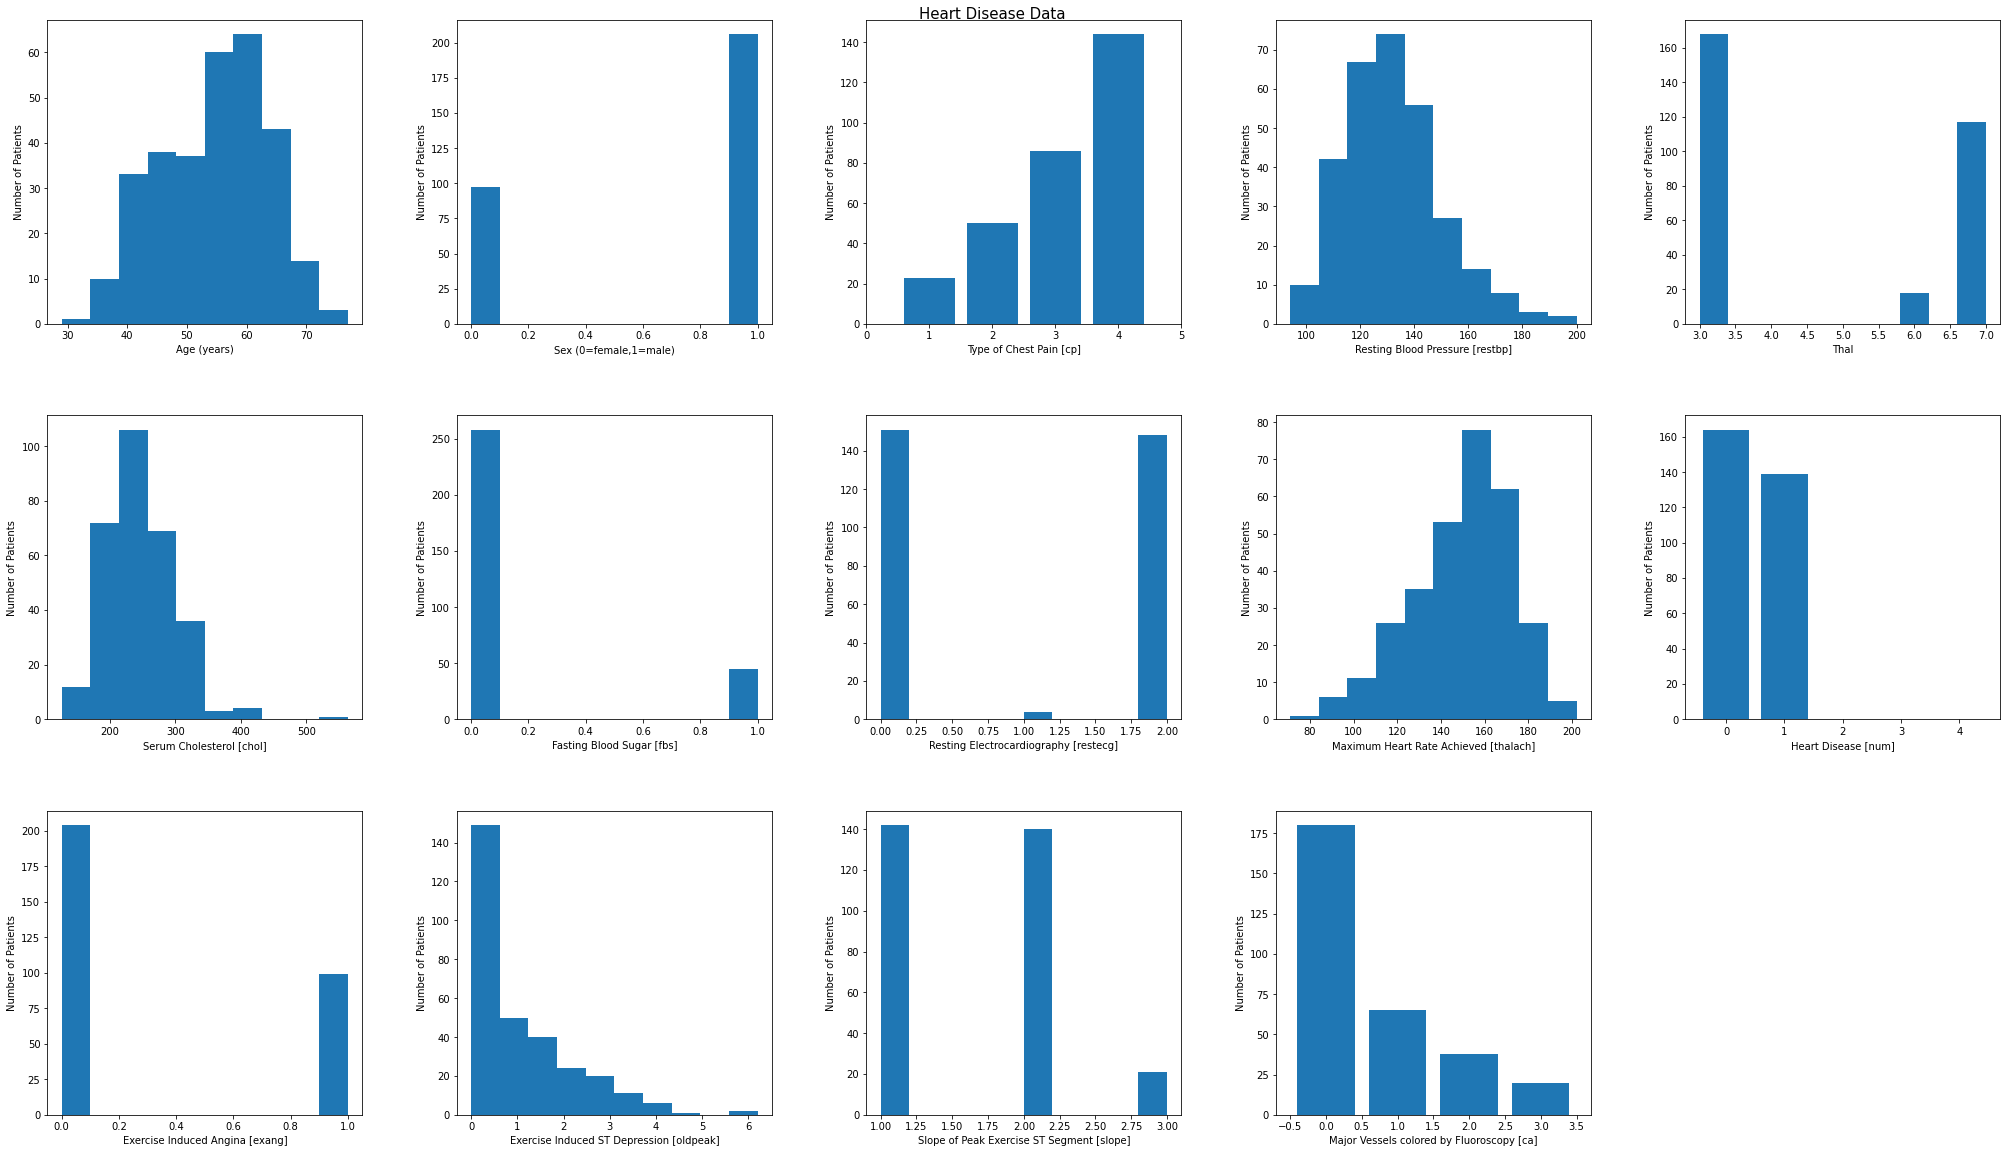

In [ ]:
''' histogram on every between every column and number of patients'''
fig, axes = plt.subplots( nrows=3, ncols=5, figsize=(35,18) )
plt.subplots_adjust( wspace=0.30, hspace=0.30, top=0.97 )
plt.suptitle("Heart Disease Data", fontsize=15)
axes[0,0].hist(df.age)
axes[0,0].set_xlabel("Age (years)")
axes[0,0].set_ylabel("Number of Patients")
axes[0,1].hist(df.sex)
axes[0,1].set_xlabel("Sex (0=female,1=male)")
axes[0,1].set_ylabel("Number of Patients")
axes[0,2].hist(df.cp,bins=4,range=(0.5,4.5),rwidth=0.80)
axes[0,2].set_xlim(0.0,5.0)
axes[0,2].set_xlabel("Type of Chest Pain [cp]")
axes[0,2].set_ylabel("Number of Patients")
axes[0,3].hist(df.trestbps)
axes[0,3].set_xlabel("Resting Blood Pressure [restbp]")
axes[0,3].set_ylabel("Number of Patients")
axes[1,0].hist(df.chol)
axes[1,0].set_xlabel("Serum Cholesterol [chol]")
axes[1,0].set_ylabel("Number of Patients")
axes[1,1].hist(df.fbs)
axes[1,1].set_xlabel("Fasting Blood Sugar [fbs]")
axes[1,1].set_ylabel("Number of Patients")
axes[1,2].hist(df.restecg)
axes[1,2].set_xlabel("Resting Electrocardiography [restecg]")
axes[1,2].set_ylabel("Number of Patients")
axes[1,3].hist(df.thalach)
axes[1,3].set_xlabel("Maximum Heart Rate Achieved [thalach]")
axes[1,3].set_ylabel("Number of Patients")
axes[2,0].hist(df.exang)
axes[2,0].set_xlabel("Exercise Induced Angina [exang]")
axes[2,0].set_ylabel("Number of Patients")
axes[2,1].hist(df.oldpeak)
axes[2,1].set_xlabel("Exercise Induced ST Depression [oldpeak]")
axes[2,1].set_ylabel("Number of Patients")
axes[2,2].hist(df.slope)
axes[2,2].set_xlabel("Slope of Peak Exercise ST Segment [slope]")
axes[2,2].set_ylabel("Number of Patients")
axes[2,3].hist(df.ca,bins=4,range=(-0.5,3.5),rwidth=0.8)
axes[2,3].set_xlim(-0.7,3.7)
axes[2,3].set_xlabel("Major Vessels colored by Fluoroscopy [ca]")
axes[2,3].set_ylabel("Number of Patients")
axes[0,4].hist(df.thal)
axes[0,4].set_xlabel("Thal")
axes[0,4].set_ylabel("Number of Patients")
axes[1,4].hist(df.num,bins=5,range=(-0.5,4.5),rwidth=0.8)
axes[1,4].set_xlim(-0.7,4.7)
axes[1,4].set_xlabel("Heart Disease [num]")
axes[1,4].set_ylabel("Number of Patients")
axes[2,4].axis("off")

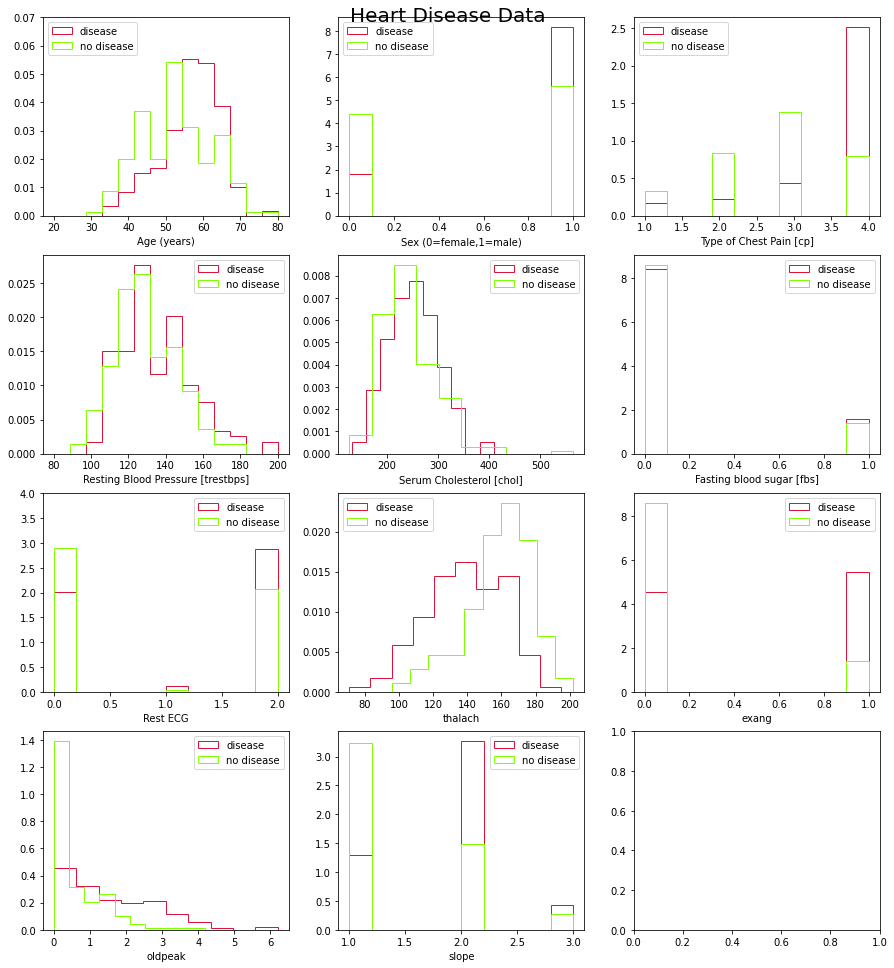

In [ ]:
'''To plot hist graph on every attribute between disease and non-disease columns'''
import matplotlib.pyplot as plt
fig, axes = plt.subplots( nrows=4, ncols=3, figsize=(15,15) )
plt.subplots_adjust( wspace=0.20, hspace=0.20, top=0.97 )
plt.suptitle("Heart Disease Data\n", fontsize=20)
bins = np.linspace(20, 80, 15)
df0=df
axes[0,0].hist(df[df.num>0].age.tolist(),bins,color=["crimson"],histtype="step",label="disease",density=True)
axes[0,0].hist(df[df.num==0].age,bins,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[0,0].set_xlabel("Age (years)")
axes[0,0].set_ylim(0.0,0.070)
axes[0,0].legend(prop={'size': 10},loc="upper left")
axes[0,1].hist(df[df.num>0].sex.tolist(),color=["crimson"],histtype="step",label="disease",density=True)
axes[0,1].hist(df[df.num==0].sex,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[0,1].set_xlabel("Sex (0=female,1=male)")
axes[0,1].legend(prop={'size': 10},loc="upper left")
axes[0,2].hist(df0[df0.num>0].cp.tolist(),color=["crimson"],histtype="step",label="disease",density=True)
axes[0,2].hist(df0[df0.num==0].cp,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[0,2].set_xlabel("Type of Chest Pain [cp]")
axes[0,2].legend(prop={'size': 10},loc="upper left")
bins = np.linspace(80, 200, 15)
axes[1,0].hist(df0[df0.num>0].trestbps.tolist(),bins,color=["crimson"],histtype="step",label="disease",density=True)
axes[1,0].hist(df0[df0.num==0].trestbps,bins,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[1,0].set_xlabel("Resting Blood Pressure [trestbps]")
axes[1,0].legend(prop={'size': 10},loc="upper right")
axes[1,1].hist(df0[df0.num>0].chol.tolist(),color=["crimson"],histtype="step",label="disease",density=True)
axes[1,1].hist(df0[df0.num==0].chol,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[1,1].set_xlabel("Serum Cholesterol [chol]")
axes[1,1].legend(prop={'size': 10},loc="upper right")
axes[1,2].hist(df0[df0.num>0].fbs.tolist(),color=["crimson"],histtype="step",label="disease",density=True)
axes[1,2].hist(df0[df0.num==0].fbs,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[1,2].set_xlabel("Fasting blood sugar [fbs]")
axes[1,2].legend(prop={'size': 10},loc="upper right")
axes[2,0].hist(df0[df0.num>0].restecg.tolist(),color=["crimson"],histtype="step",label="disease",density=True)
axes[2,0].hist(df0[df0.num==0].restecg,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[2,0].set_xlabel("Rest ECG")
axes[2,0].set_ylim(0.0,4.0)
axes[2,0].legend(prop={'size': 10},loc="upper right")
axes[2,1].hist(df0[df0.num>0].thalach.tolist(),color=["crimson"],histtype="step",label="disease",density=True)
axes[2,1].hist(df0[df0.num==0].thalach,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[2,1].set_xlabel("thalach")
axes[2,1].legend(prop={'size': 10},loc="upper left")
axes[2,2].hist(df0[df0.num>0].exang.tolist(),color=["crimson"],histtype="step",label="disease",density=True)
axes[2,2].hist(df0[df0.num==0].exang,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[2,2].set_xlabel("exang")
axes[2,2].legend(prop={'size': 10},loc="upper right")
axes[3,0].hist(df0[df0.num>0].oldpeak.tolist(),color=["crimson"],histtype="step",label="disease",density=True)
axes[3,0].hist(df0[df0.num==0].oldpeak,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[3,0].set_xlabel("oldpeak")
axes[3,0].legend(prop={'size': 10},loc="upper right")
axes[3,1].hist(df0[df0.num>0].slope.tolist(),color=["crimson"],histtype="step",label="disease",density=True)
axes[3,1].hist(df0[df0.num==0].slope,color=["chartreuse"],histtype="step",label="no disease",density=True)
axes[3,1].set_xlabel("slope")
axes[3,1].legend(prop={'size': 10},loc="upper right")
plt.show()

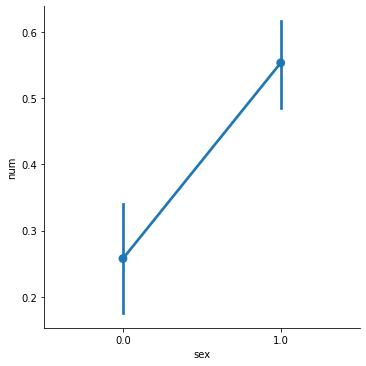

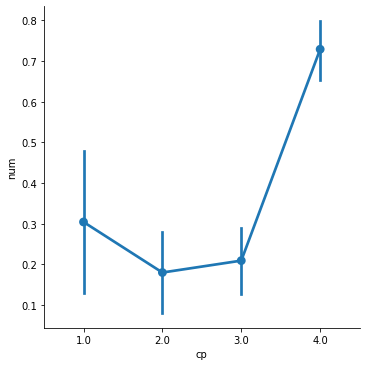

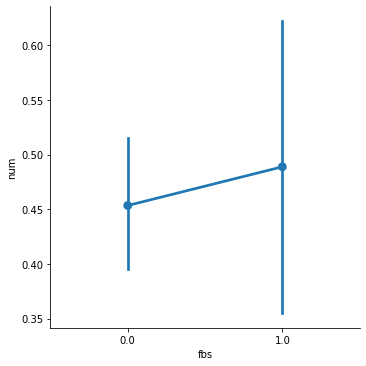

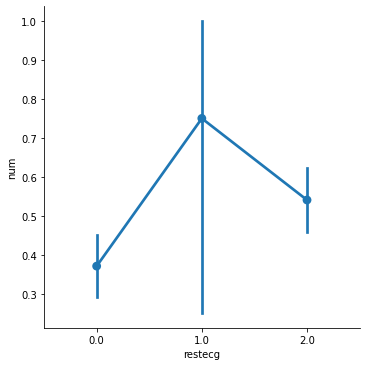

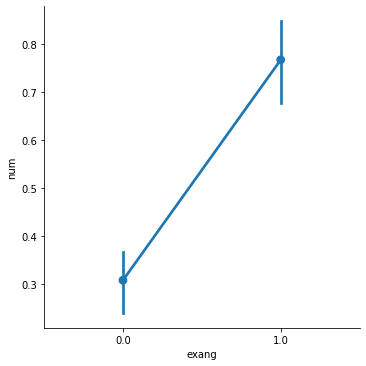

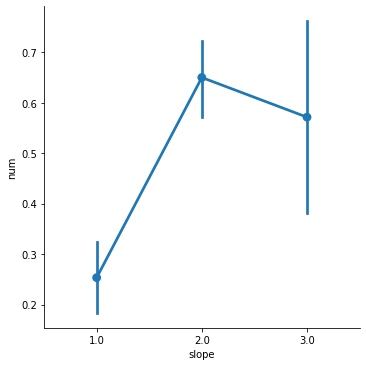

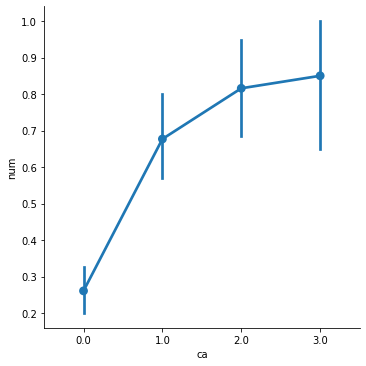

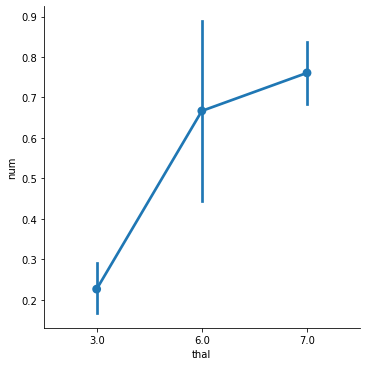

In [ ]:
for i,col in enumerate(['sex','cp','fbs','restecg','exang', 'slope', 'ca','thal']):
  g=sns.catplot(x=col,y='num',data=df,kind='point')

In [ ]:
x=df.drop('num',1) #removing target or dependent column from source df and assigning to variable x
y=df['num'] #assiging target column to variable y

#dividing data into training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)# size of training data will 80%
#applying model 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
# model is now ready as we fitted training data in model
model.predict(x_test)
#comapring our model prediction
result=model.score(x_test,y_test)
print("LogisticRegression",result)

LogisticRegression 0.8688524590163934


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
model2 = RandomForestClassifier()
model2.fit(x_train,y_train)
# predictions
model2_predict = model2.predict(x_test)
print("RandomForestClassifier",model2.score(x_test,y_test))

RandomForestClassifier 0.9016393442622951


In [ ]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
print("KNeighborsClassifier",classifier.score(x_test,y_test))
#confusion mattrix to find how many wrong outputs are there of prediced values over yTest values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

KNeighborsClassifier 0.639344262295082


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
# applying knn model
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("StandardScaler",classifier.score(x_test,y_test))

StandardScaler 0.8032786885245902


In [ ]:
#confusion mattrix to find how many wrong outputs are there of prediced values over yTest values
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[28  3]
 [ 9 21]]


[[28  3]
 [ 9 21]]


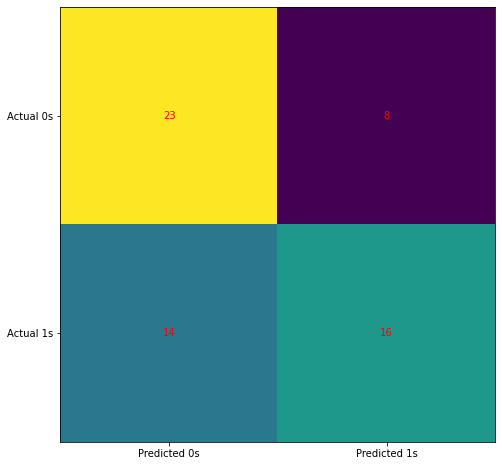

In [ ]:
#Model Evaluation using Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
#Confusion matrix metrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Accuracy :  0.8032786885245902
Precision: 0.875
Recall: 0.7


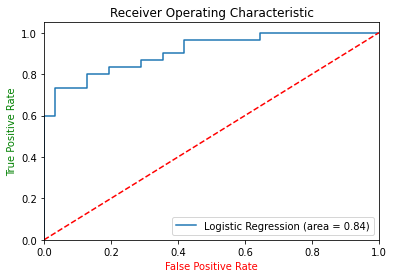

In [ ]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', color = 'red')
plt.ylabel('True Positive Rate', color = 'green')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()